# DOS Attack HTTP Project

İlk 5 Satır:
                                     Flow_ID           Src_IP  Src_Port  \
0  192.168.100.150-192.168.100.3-51370-80-6  192.168.100.150     51370   
1  192.168.100.150-192.168.100.3-51368-80-6  192.168.100.150     51368   
2  192.168.100.150-192.168.100.3-51372-80-6  192.168.100.150     51372   
3  192.168.100.150-192.168.100.3-51374-80-6  192.168.100.150     51374   
4  192.168.100.150-192.168.100.3-51376-80-6  192.168.100.150     51376   

          Dst_IP  Dst_Port  Protocol               Timestamp  Flow_Duration  \
0  192.168.100.3        80         6  04/06/2018 01:02:02 AM        5003748   
1  192.168.100.3        80         6  04/06/2018 01:02:02 AM        5004214   
2  192.168.100.3        80         6  04/06/2018 01:02:02 AM        5003495   
3  192.168.100.3        80         6  04/06/2018 01:02:02 AM        5003215   
4  192.168.100.3        80         6  04/06/2018 01:02:02 AM        5002975   

   Tot_Fwd_Pkts  Tot_Bwd_Pkts  ...  Active_Std  Active_Max  Active

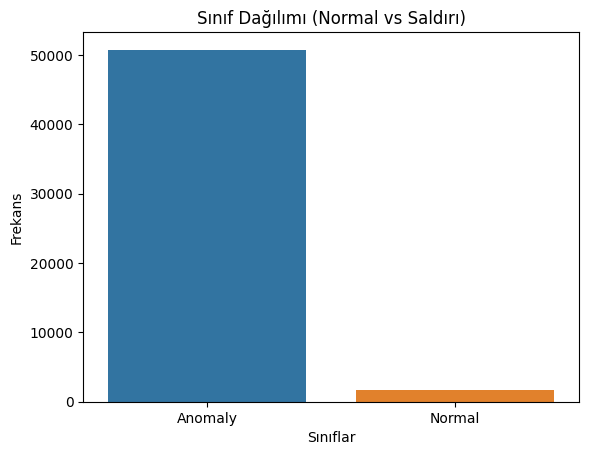

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "DoS_Attack_HTTP_Dataset.csv"
data = pd.read_csv(file_path)

print("İlk 5 Satır:\n", data.head())

print("\nVeri Seti Bilgileri:")
print(data.info())

print("\nEksik Değerler:\n", data.isnull().sum())

print("\nSınıf Dağılımı:\n", data['Label'].value_counts())

sns.countplot(data=data, x='Label')
plt.title('Sınıf Dağılımı (Normal vs Saldırı)')
plt.xlabel('Sınıflar')
plt.ylabel('Frekans')
plt.show()


In [2]:
categorical_columns = data.select_dtypes(include=['object']).columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

print("Kategorik Kolonlar:")
print(categorical_columns)

print("\nSayısal Kolonlar:")
print(numerical_columns)

# Sayısal kolonların istatistiksel özetini alalım
print("\nSayısal Kolonların İstatistiksel Özeti:")
print(data[numerical_columns].describe())


Kategorik Kolonlar:
Index(['Flow_ID', 'Src_IP', 'Dst_IP', 'Timestamp', 'Label', 'Cat', 'Sub_Cat'], dtype='object')

Sayısal Kolonlar:
Index(['Src_Port', 'Dst_Port', 'Protocol', 'Flow_Duration', 'Tot_Fwd_Pkts',
       'Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max',
       'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std',
       'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean',
       'Bwd_Pkt_Len_Std', 'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Tot',
       'Fwd_IAT_Mean', 'Bwd_IAT_Mean', 'Fwd_IAT_Max', 'Fwd_IAT_Min',
       'Bwd_IAT_Tot', 'Fwd_IAT_Std', 'Bwd_IAT_Std', 'Bwd_IAT_Max',
       'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags',
       'Bwd_URG_Flags', 'Fwd_Header_Len', 'Bwd_Header_Len', 'Fwd_Pkts/s',
       'Bwd_Pkts/s', 'Pkt_Len_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean',
       'Pkt_Len_Std', 'Pkt_Len_Var', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt',
       'RST_Flag_C

c:\Users\Baki Akgun\New Folder\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


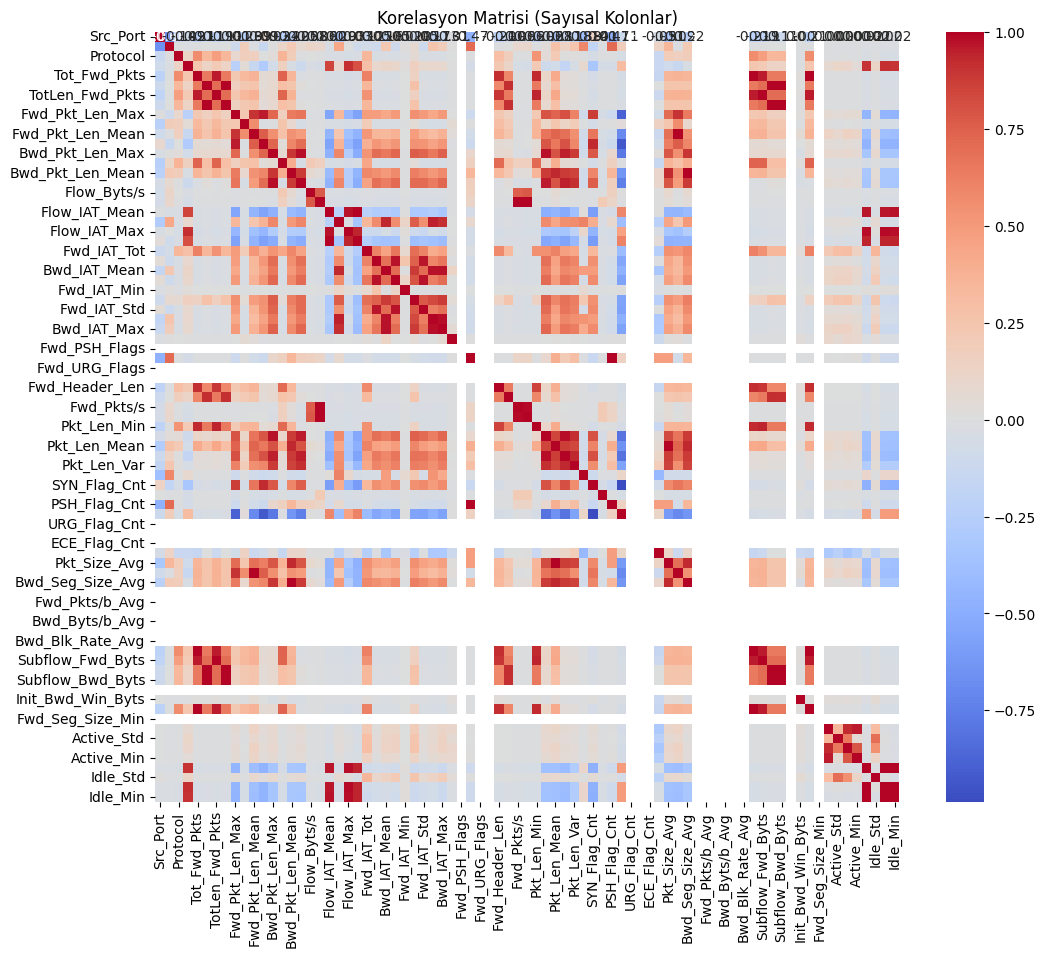


Eşik Değerin Üzerinde Olan Korelasyonlar:

               Src_Port  Dst_Port  Protocol  Flow_Duration  Tot_Fwd_Pkts  \
Src_Port       1.000000 -0.664148       NaN            NaN           NaN   
Dst_Port      -0.664148  1.000000       NaN            NaN           NaN   
Protocol            NaN       NaN  1.000000            NaN      0.560377   
Flow_Duration       NaN       NaN       NaN       1.000000           NaN   
Tot_Fwd_Pkts        NaN       NaN  0.560377            NaN      1.000000   
...                 ...       ...       ...            ...           ...   
Active_Min          NaN       NaN       NaN            NaN           NaN   
Idle_Mean           NaN       NaN       NaN       0.904314           NaN   
Idle_Std            NaN       NaN       NaN            NaN           NaN   
Idle_Max            NaN       NaN       NaN       0.907988           NaN   
Idle_Min            NaN       NaN       NaN       0.901850           NaN   

               Tot_Bwd_Pkts  TotLen_Fwd_Pkt

In [5]:
# Sadece sayısal verilerle korelasyon matrisi oluşturma
corr_matrix = data[numerical_columns].corr()

# Korelasyon matrisi görselleştirme
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korelasyon Matrisi (Sayısal Kolonlar)")
plt.show()

# Önemli korelasyon değerlerini belirlemek
threshold = 0.5  # Örnek eşik değeri
high_corr_features = corr_matrix[abs(corr_matrix) > threshold]
print("\nEşik Değerin Üzerinde Olan Korelasyonlar:\n")
print(high_corr_features)


In [8]:
print('\nInformation about the dataset')
data.info()


Information about the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52466 entries, 0 to 52465
Data columns (total 86 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flow_ID            52466 non-null  object 
 1   Src_IP             52466 non-null  object 
 2   Src_Port           52466 non-null  int64  
 3   Dst_IP             52466 non-null  object 
 4   Dst_Port           52466 non-null  int64  
 5   Protocol           52466 non-null  int64  
 6   Timestamp          52466 non-null  object 
 7   Flow_Duration      52466 non-null  int64  
 8   Tot_Fwd_Pkts       52466 non-null  int64  
 9   Tot_Bwd_Pkts       52466 non-null  int64  
 10  TotLen_Fwd_Pkts    52466 non-null  float64
 11  TotLen_Bwd_Pkts    52466 non-null  float64
 12  Fwd_Pkt_Len_Max    52466 non-null  float64
 13  Fwd_Pkt_Len_Min    52466 non-null  float64
 14  Fwd_Pkt_Len_Mean   52466 non-null  float64
 15  Fwd_Pkt_Len_Std    52466 non-null  floa

<Axes: xlabel='Label', ylabel='Flow_Duration'>

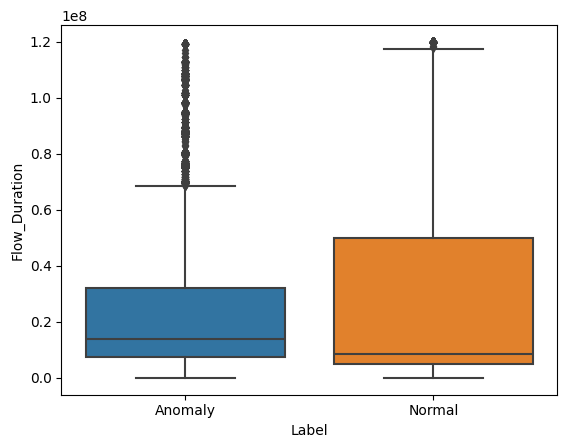

In [28]:
import seaborn as sns
sns.boxplot(x='Label', y='Flow_Duration', data=data)  # Saldırı ve normal veri arasındaki farkları görmek için


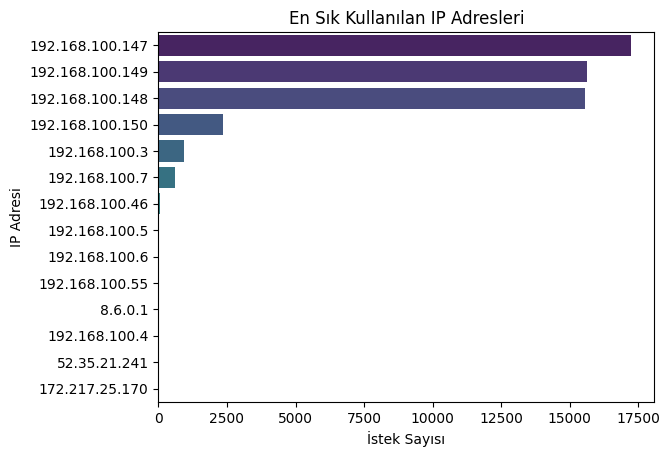

In [9]:
# IP adresi bazında istek frekansını hesaplama
ip_request_count = data['Src_IP'].value_counts()
data['ip_request_count'] = data['Src_IP'].map(ip_request_count)

# İlk 8 IP adresinin frekansını görselleştirme
import seaborn as sns
import matplotlib.pyplot as plt

top_ips = ip_request_count.head(30)
sns.barplot(x=top_ips.values, y=top_ips.index, palette='viridis')
plt.title("En Sık Kullanılan IP Adresleri")
plt.xlabel("İstek Sayısı")
plt.ylabel("IP Adresi")
plt.show()

# IP segmentlerinden yeni özellikler çıkarma (örneğin ilk 3 segment)
data['ip_segment'] = data['Src_IP'].apply(lambda x: '.'.join(x.split('.')[:3]))
segment_request_count = data['ip_segment'].value_counts()
data['segment_request_count'] = data['ip_segment'].map(segment_request_count)


In [13]:
null_values = data.isnull().sum()

In [14]:
print('Display columns with null values')
null_columns = null_values[null_values > 0]
if not null_columns.empty:
    print('Columns with null values:')
    print(null_columns)
else:
    print('No null values found in the dataset.')

Display columns with null values
Columns with null values:
Flow_Byts/s    3
dtype: int64


In [16]:
#Impute null values with the mean of the column
mean_flow_bytes_per_second = data['Flow_Byts/s'].mean()
data['Flow_Byts/s'].fillna(mean_flow_bytes_per_second)

0           160.479704
1           176.651118
2           160.887540
3           180.683820
4           178.493796
             ...      
52461     31529.640358
52462    148918.965671
52463     70567.586355
52464      6535.064331
52465       293.856615
Name: Flow_Byts/s, Length: 52466, dtype: float64

In [18]:
# Check for null values in the "Flow_Byts/s" column
null_values_flow_bytes_per_second = data['Flow_Byts/s'].isnull().sum()
print("Null values in 'Flow_Byts/s' column after replacement:", null_values_flow_bytes_per_second)

Null values in 'Flow_Byts/s' column after replacement: 3


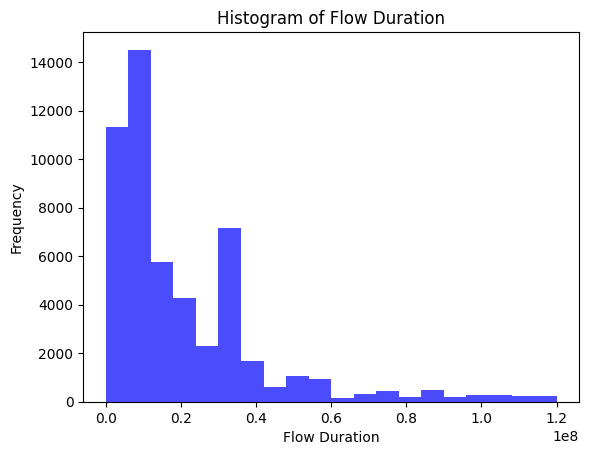

In [20]:
import matplotlib.pyplot as plt

# Histogram of a numerical feature
plt.hist(data['Flow_Duration'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Flow Duration')
plt.ylabel('Frequency')
plt.title('Histogram of Flow Duration')
plt.show()

In [22]:
# Summary statistics of a numerical feature
print("Summary statistics of Flow Duration:")
print(data['Flow_Duration'].describe())

Summary statistics of Flow Duration:
count    5.246600e+04
mean     2.151672e+07
std      2.147455e+07
min      0.000000e+00
25%      7.260614e+06
50%      1.382454e+07
75%      3.206856e+07
max      1.200000e+08
Name: Flow_Duration, dtype: float64


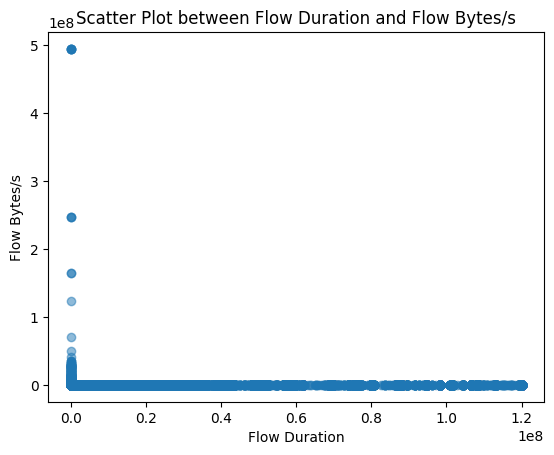

In [25]:
# Scatter plot between two numerical features
plt.scatter(data['Flow_Duration'], data['Flow_Byts/s'], alpha=0.5)
plt.xlabel('Flow Duration')
plt.ylabel('Flow Bytes/s')
plt.title('Scatter Plot between Flow Duration and Flow Bytes/s')
plt.show()

In [26]:
# Count the number of each unique value in the "Label" column
label_counts = data['Label'].value_counts()

# Assuming 'normal' and 'anomaly' are the actual labels in your "Label" column
print("Number of normal instances:", label_counts['Normal'])
print("Number of anomaly instances:", label_counts['Anomaly'])

Number of normal instances: 1700
Number of anomaly instances: 50766


             PC1        PC2    Label
0       0.749729  -0.367426  Anomaly
1       1.051459  -0.396767  Anomaly
2       0.757048  -0.368106  Anomaly
3       1.127126  -0.404534  Anomaly
4       1.085388  -0.400242  Anomaly
...          ...        ...      ...
52461  15.606110  20.978052   Normal
52462  36.348131  67.134993   Normal
52463  24.772809  40.610792   Normal
52464   6.366586  14.865806   Normal
52465   8.998440   1.825794   Normal

[52466 rows x 3 columns]


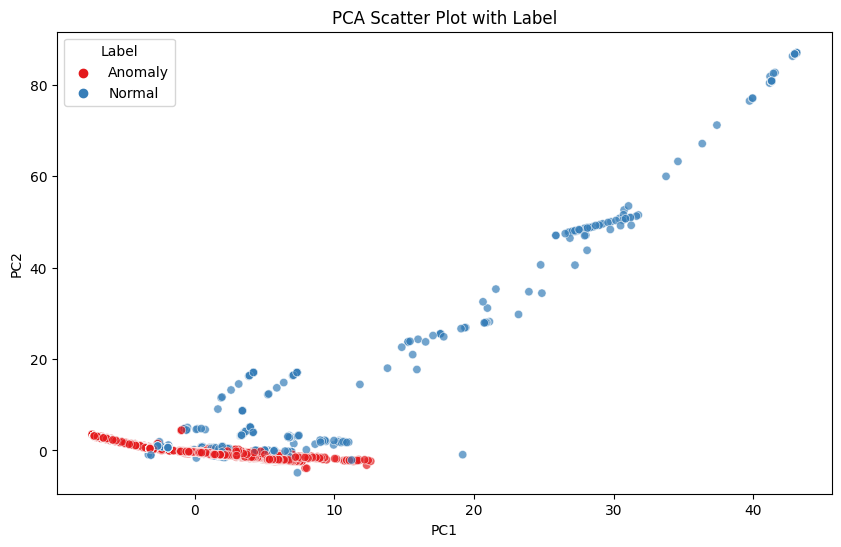

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Replace infinity values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Select only numerical columns for standardization
numerical_columns = data.select_dtypes(include=['number'])

# Impute NaN values with the mean of each column
numerical_columns_filled = numerical_columns.fillna(numerical_columns.mean())

# Standardize the numerical data
scaler = StandardScaler()
numerical_columns_scaled = scaler.fit_transform(numerical_columns_filled)

# Perform PCA on the scaled data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numerical_columns_scaled)

# Create DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Concatenate PCA results with labels
pca_df['Label'] = data['Label']
print(pca_df)

# Plot PCA results with labels
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Label', palette='Set1', alpha=0.7)
plt.title('PCA Scatter Plot with Label')
plt.show()

In [33]:
pca_df.head(10)

,PC1,PC2,Label
0,0.749729,-0.367426,Anomaly
1,1.051459,-0.396767,Anomaly
2,0.757048,-0.368106,Anomaly
3,1.127126,-0.404534,Anomaly
4,1.085388,-0.400242,Anomaly
5,2.066563,-0.526911,Anomaly
6,1.600392,-0.460141,Anomaly
7,1.036435,-0.395369,Anomaly
8,0.600362,-0.354068,Anomaly
9,1.303184,-0.423245,Anomaly


In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = "DoS_Attack_HTTP_Dataset.csv"
df = pd.read_csv(file_path)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in ['Label', 'Cat', 'Sub_Cat']:
    df[col + '_Encoded'] = label_encoder.fit_transform(df[col])

# Flip the labels
for col in ['Label_Encoded', 'Cat_Encoded', 'Sub_Cat_Encoded']:
    df[col] = 1 - df[col]

# Drop original categorical columns after encoding, but keep the Label_Encoded column
df.drop(['Label', 'Cat', 'Sub_Cat'], axis=1, inplace=True)

# Calculate correlation only with numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_with_label = df[numeric_columns].corrwith(df['Label_Encoded']).drop(labels='Label_Encoded', errors='ignore')

# Sort the correlations in descending order
correlation_with_label_sorted = correlation_with_label.abs().sort_values(ascending=False)

# Display the sorted correlation values
print(correlation_with_label_sorted.head(20))


Dst_Port             0.918033
Src_Port             0.706063
PSH_Flag_Cnt         0.673029
Bwd_PSH_Flags        0.673029
FIN_Flag_Cnt         0.521628
Pkt_Size_Avg         0.433530
Pkt_Len_Mean         0.386511
Flow_IAT_Std         0.365963
Bwd_Pkt_Len_Min      0.342513
Fwd_Pkt_Len_Min      0.339221
Fwd_Act_Data_Pkts    0.302957
Subflow_Fwd_Pkts     0.302577
Tot_Fwd_Pkts         0.302577
Bwd_Seg_Size_Avg     0.293537
Bwd_Pkt_Len_Mean     0.293537
Pkt_Len_Min          0.287725
Fwd_Header_Len       0.282427
Subflow_Fwd_Byts     0.267041
TotLen_Fwd_Pkts      0.267041
Pkt_Len_Var          0.237374
dtype: float64


c:\Users\Baki Akgun\New Folder\Lib\site-packages\numpy\lib\function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
c:\Users\Baki Akgun\New Folder\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Baki Akgun\New Folder\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [2]:
df.tail(20)

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label_Encoded,Cat_Encoded,Sub_Cat_Encoded
52446,192.168.100.3-192.168.100.6-80-80-6,192.168.100.6,80,192.168.100.3,80,6,04/06/2018 01:44:31 AM,113388934,3061,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
52447,192.168.100.3-52.64.239.193-41307-8883-6,192.168.100.3,41307,52.64.239.193,8883,6,04/06/2018 01:44:32 AM,110044964,39,41,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
52448,192.168.100.5-192.168.100.46-80-3456-17,192.168.100.46,3456,192.168.100.5,80,17,04/06/2018 01:46:25 AM,119992576,9596,9598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
52449,192.168.100.3-192.168.100.55-80-8080-6,192.168.100.55,8080,192.168.100.3,80,6,04/06/2018 01:46:25 AM,119992566,9596,9598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
52450,192.168.100.5-192.168.100.46-80-80-17,192.168.100.46,80,192.168.100.5,80,17,04/06/2018 01:46:25 AM,119994246,9596,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
52451,192.168.100.5-192.168.100.46-80-80-6,192.168.100.46,80,192.168.100.5,80,6,04/06/2018 01:46:25 AM,119994229,9596,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
52452,192.168.100.3-192.168.100.5-0-0-6,192.168.100.5,0,192.168.100.3,0,6,04/06/2018 01:46:25 AM,119980187,5757,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
52453,192.168.100.3-192.168.100.6-80-80-6,192.168.100.6,80,192.168.100.3,80,6,04/06/2018 01:46:25 AM,119967737,3238,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
52454,192.168.100.3-192.168.100.7-565-365-17,192.168.100.7,365,192.168.100.3,565,17,04/06/2018 01:46:25 AM,119994227,5158,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
52455,192.168.100.3-52.64.239.193-41307-8883-6,192.168.100.3,41307,52.64.239.193,8883,6,04/06/2018 01:46:25 AM,116827971,45,47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [3]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_columns)

Categorical Columns: ['Flow_ID', 'Src_IP', 'Dst_IP', 'Timestamp']


In [4]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif
import numpy as np

# Ensure 'Label_Encoded' exists and is numeric
if 'Label_Encoded' not in df.columns:
    raise ValueError("'Label_Encoded' column is missing. Please ensure it was created correctly.")

if df['Label_Encoded'].isnull().any():
    raise ValueError("'Label_Encoded' column contains NaN values. Please address this issue.")

# Selecting numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
if 'Label_Encoded' in numerical_cols:
    X_numerical = df[numerical_cols].drop('Label_Encoded', axis=1)
else:
    X_numerical = df[numerical_cols]

# Handle infinite or very large values
X_numerical.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check for remaining NaN values after replacing infinities
if X_numerical.isnull().any().any():
    print("Replacing NaN values with column means.")
    imputer = SimpleImputer(strategy='mean')
    X_numerical_imputed = imputer.fit_transform(X_numerical)
else:
    X_numerical_imputed = X_numerical.values

# Calculate mutual information for numerical features
mutual_info_numerical = mutual_info_classif(X_numerical_imputed, df['Label_Encoded'], discrete_features='auto')

# Create a DataFrame to display the results
mutual_info_numerical_df = pd.DataFrame(mutual_info_numerical, index=X_numerical.columns, columns=['Mutual Information'])
mutual_info_numerical_df.sort_values(by='Mutual Information', ascending=False, inplace=True)

# Display the top 10 features with the highest mutual information
print(mutual_info_numerical_df.head(10))


C:\Users\Baki Akgun\AppData\Local\Temp\ipykernel_22648\797178677.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_numerical.replace([np.inf, -np.inf], np.nan, inplace=True)


Replacing NaN values with column means.
                Mutual Information
Src_Port                  0.140053
Dst_Port                  0.127884
Flow_Pkts/s               0.123039
Bwd_Pkts/s                0.122798
Fwd_Pkts/s                0.121596
Flow_IAT_Mean             0.119774
Bwd_Header_Len            0.116549
Flow_IAT_Std              0.113392
Flow_Duration             0.108289
Down/Up_Ratio             0.107397


In [5]:
# Create new feature: Packet rate (packets per second)
df['Packet_Rate'] = df['Tot_Fwd_Pkts'] / df['Flow_Duration']

# Create new feature: Packet size distribution (ratio of forward packets to total packets)
df['Packet_Size_Distribution'] = df['Tot_Fwd_Pkts'] / (df['Tot_Fwd_Pkts'] + df['Tot_Bwd_Pkts'])

# Create new feature: Frequency of specific protocol types
# Assuming Protocol column contains protocol types
protocol_counts = df['Protocol'].value_counts(normalize=True)  # Get relative frequency of each protocol
df['Protocol_Frequency'] = df['Protocol'].map(protocol_counts)

# Display the updated DataFrame with new features
df.head()

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label_Encoded,Cat_Encoded,Sub_Cat_Encoded,Packet_Rate,Packet_Size_Distribution,Protocol_Frequency
0,192.168.100.150-192.168.100.3-51370-80-6,192.168.100.150,51370,192.168.100.3,80,6,04/06/2018 01:02:02 AM,5003748,3,5,...,0.0,0.0,0.0,0.0,1,1,1,5.995506e-07,0.375,0.997846
1,192.168.100.150-192.168.100.3-51368-80-6,192.168.100.150,51368,192.168.100.3,80,6,04/06/2018 01:02:02 AM,5004214,3,5,...,0.0,0.0,0.0,0.0,1,1,1,5.994947e-07,0.375,0.997846
2,192.168.100.150-192.168.100.3-51372-80-6,192.168.100.150,51372,192.168.100.3,80,6,04/06/2018 01:02:02 AM,5003495,3,5,...,0.0,0.0,0.0,0.0,1,1,1,5.995809e-07,0.375,0.997846
3,192.168.100.150-192.168.100.3-51374-80-6,192.168.100.150,51374,192.168.100.3,80,6,04/06/2018 01:02:02 AM,5003215,3,5,...,0.0,0.0,0.0,0.0,1,1,1,5.996144e-07,0.375,0.997846
4,192.168.100.150-192.168.100.3-51376-80-6,192.168.100.150,51376,192.168.100.3,80,6,04/06/2018 01:02:02 AM,5002975,3,5,...,0.0,0.0,0.0,0.0,1,1,1,5.996432e-07,0.375,0.997846


In [6]:
from sklearn.impute import SimpleImputer

# Impute missing values in numerical columns with the mean
imputer = SimpleImputer(strategy='mean')
X_numerical_imputed = imputer.fit_transform(X_numerical)

# Calculate mutual information for numerical features after imputation
mutual_info_numerical = mutual_info_classif(X_numerical_imputed, df['Label_Encoded'], discrete_features='auto')

# Create a DataFrame to display the results
mutual_info_numerical_df = pd.DataFrame(mutual_info_numerical, index=X_numerical.columns, columns=['Mutual Information'])
mutual_info_numerical_df.sort_values(by='Mutual Information', ascending=False, inplace=True)
mutual_info_numerical_df.head(20)

,Mutual Information
Src_Port,0.140033
Dst_Port,0.128191
Flow_Pkts/s,0.123186
Bwd_Pkts/s,0.122948
Fwd_Pkts/s,0.122092
Flow_IAT_Mean,0.120025
Bwd_Header_Len,0.116508
Flow_IAT_Std,0.113466
Flow_Duration,0.108549
Down/Up_Ratio,0.107983


In [7]:
# List of features related to network traffic patterns, packet characteristics, and communication behavior
relevant_features = [
    'Flow_Duration', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts',
    'Fwd_Pkt_Len_Max', 'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std',
    'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean', 'Bwd_Pkt_Len_Std',
    'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min',
    'Fwd_IAT_Tot', 'Fwd_IAT_Mean', 'Bwd_IAT_Mean', 'Fwd_IAT_Max', 'Fwd_IAT_Min',
    'Bwd_IAT_Tot', 'Fwd_IAT_Std', 'Bwd_IAT_Std', 'Bwd_IAT_Max', 'Bwd_IAT_Min',
    'Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags', 'Bwd_URG_Flags',
    'Fwd_Header_Len', 'Bwd_Header_Len', 'Fwd_Pkts/s', 'Bwd_Pkts/s',
    'Pkt_Len_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean', 'Pkt_Len_Std', 'Pkt_Len_Var',
    'FIN_Flag_Cnt', 'SYN_Flag_Cnt', 'RST_Flag_Cnt', 'PSH_Flag_Cnt', 'ACK_Flag_Cnt',
    'URG_Flag_Cnt', 'CWE_Flag_Count', 'ECE_Flag_Cnt', 'Down/Up_Ratio',
    'Pkt_Size_Avg', 'Fwd_Seg_Size_Avg', 'Bwd_Seg_Size_Avg', 'Fwd_Byts/b_Avg',
    'Fwd_Pkts/b_Avg', 'Fwd_Blk_Rate_Avg', 'Bwd_Byts/b_Avg', 'Bwd_Pkts/b_Avg',
    'Bwd_Blk_Rate_Avg', 'Subflow_Fwd_Pkts', 'Subflow_Fwd_Byts', 'Subflow_Bwd_Pkts',
    'Subflow_Bwd_Byts', 'Init_Fwd_Win_Byts', 'Init_Bwd_Win_Byts', 'Fwd_Act_Data_Pkts',
    'Fwd_Seg_Size_Min', 'Active_Mean', 'Active_Std', 'Active_Max', 'Active_Min',
    'Idle_Mean', 'Idle_Std', 'Idle_Max', 'Idle_Min',
    'Packet_Rate', 'Packet_Size_Distribution', 'Protocol_Frequency'
]

# Remove irrelevant or redundant features
df_selected_features = df[relevant_features]

# Display the selected features
print("Updated Selected Features:")
df_selected_features.columns

Updated Selected Features:


Index(['Flow_Duration', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts',
       'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max', 'Fwd_Pkt_Len_Min',
       'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std', 'Bwd_Pkt_Len_Max',
       'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean', 'Bwd_Pkt_Len_Std', 'Flow_Byts/s',
       'Flow_Pkts/s', 'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max',
       'Flow_IAT_Min', 'Fwd_IAT_Tot', 'Fwd_IAT_Mean', 'Bwd_IAT_Mean',
       'Fwd_IAT_Max', 'Fwd_IAT_Min', 'Bwd_IAT_Tot', 'Fwd_IAT_Std',
       'Bwd_IAT_Std', 'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags',
       'Bwd_PSH_Flags', 'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Len',
       'Bwd_Header_Len', 'Fwd_Pkts/s', 'Bwd_Pkts/s', 'Pkt_Len_Min',
       'Pkt_Len_Max', 'Pkt_Len_Mean', 'Pkt_Len_Std', 'Pkt_Len_Var',
       'FIN_Flag_Cnt', 'SYN_Flag_Cnt', 'RST_Flag_Cnt', 'PSH_Flag_Cnt',
       'ACK_Flag_Cnt', 'URG_Flag_Cnt', 'CWE_Flag_Count', 'ECE_Flag_Cnt',
       'Down/Up_Ratio', 'Pkt_Size_Avg', 'Fwd_Seg_Size_Avg', 'Bwd_Seg_Size_Avg',
   

In [8]:
# Impute missing values in numerical columns with the mean
imputer = SimpleImputer(strategy='mean')
X_numerical_imputed = imputer.fit_transform(X_numerical)

# Calculate mutual information for numerical features after imputation
mutual_info_numerical = mutual_info_classif(X_numerical_imputed, df['Label_Encoded'], discrete_features='auto')

# Create a DataFrame to display the results
mutual_info_numerical_df = pd.DataFrame(mutual_info_numerical, index=X_numerical.columns, columns=['Mutual Information'])
mutual_info_numerical_df.sort_values(by='Mutual Information', ascending=False, inplace=True)
mutual_info_numerical_df.head(20)

,Mutual Information
Src_Port,0.140048
Dst_Port,0.128054
Flow_Pkts/s,0.123294
Bwd_Pkts/s,0.122994
Fwd_Pkts/s,0.121685
Flow_IAT_Mean,0.119996
Bwd_Header_Len,0.116958
Flow_IAT_Std,0.113168
Flow_Duration,0.108461
Down/Up_Ratio,0.107781


In [9]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select only numerical features for scaling
numerical_features = df_selected_features.select_dtypes(include=['float64', 'int64'])

# Clip extreme values to a specified range
lower_bound = -1e6  # Specify the lower bound
upper_bound = 1e6   # Specify the upper bound
numerical_features = numerical_features.clip(lower=lower_bound, upper=upper_bound)

# Standardize numerical features since we are using bi-LSTM
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)
df_scaled = pd.DataFrame(scaled_features, columns=numerical_features.columns)

# Concatenate scaled numerical features with categorical features
df_concatenated = pd.concat([df_scaled, df[['Cat_Encoded', 'Sub_Cat_Encoded']]], axis=1)

# Display the concatenated dataset
print("Concatenated Dataset:")
print(df_concatenated.head())

# Split the concatenated dataset into features (X) and target (y)
X = df_concatenated
y = df['Label_Encoded']

# Further split the dataset into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train['Flow_Pkts/s'] = X_train['Flow_Pkts/s'].fillna(0)



# Display the shapes of the training and validation sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)

Concatenated Dataset:
   Flow_Duration  Tot_Fwd_Pkts  Tot_Bwd_Pkts  TotLen_Fwd_Pkts  \
0       0.187212     -0.053808     -0.024729        -0.054915   
1       0.187212     -0.053808     -0.024729        -0.053369   
2       0.187212     -0.053808     -0.024729        -0.054877   
3       0.187212     -0.053808     -0.024729        -0.052988   
4       0.187212     -0.053808     -0.024729        -0.053198   

   TotLen_Bwd_Pkts  Fwd_Pkt_Len_Max  Fwd_Pkt_Len_Min  Fwd_Pkt_Len_Mean  \
0        -0.028323         0.262900        -0.062076          0.166558   
1        -0.028323         0.599119        -0.062076          0.429816   
2        -0.028323         0.271202        -0.062076          0.173058   
3        -0.028323         0.682136        -0.062076          0.494818   
4        -0.028323         0.636477        -0.062076          0.459067   

   Fwd_Pkt_Len_Std  Bwd_Pkt_Len_Max  ...  Active_Min  Idle_Mean  Idle_Std  \
0         0.314315         0.231888  ...   -0.107812  -1.509134 -

In [10]:
 # Check for null values in X_train by column
null_columns = X_train.columns[X_train.isnull().any()]
print("Columns with null values in X_train:")
print(null_columns)

Columns with null values in X_train:
Index(['Flow_Byts/s'], dtype='object')


In [11]:
X_train['Flow_Pkts/s'] = X_train['Flow_Pkts/s'].fillna(0)


In [12]:
# Check for null values in X_train by column
null_columns = X_train.columns[X_train.isnull().any()]
print("Columns with null values in X_train:")
print(null_columns)

Columns with null values in X_train:
Index(['Flow_Byts/s'], dtype='object')


In [13]:
X_train['Flow_Byts/s'] = X_train['Flow_Byts/s'].fillna(0)
null_columns = X_train.columns[X_train.isnull().any()]
print("Columns with null values in X_train after filling NaN:")
print(null_columns)

Columns with null values in X_train after filling NaN:
Index([], dtype='object')


 ## Traditional Models(Random Forest, XGBoost, LightGBM, Logistic Regression)

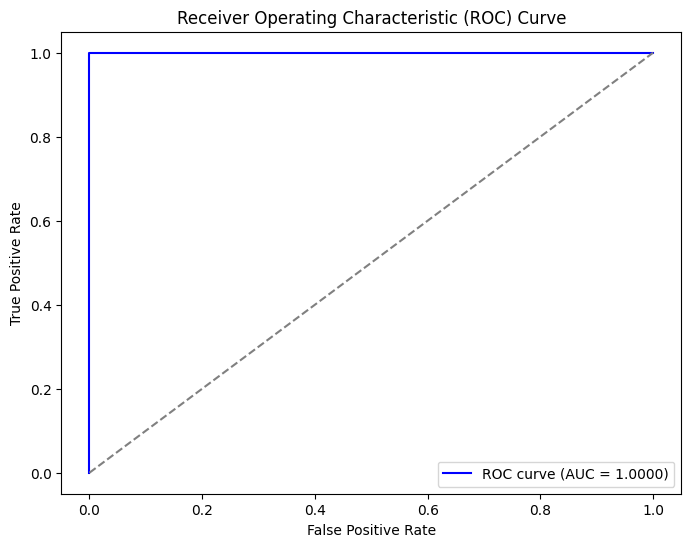

Random Forest Results:
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000, AUC: 1.0000
Confusion Matrix:
 [[  338     0]
 [    0 10156]]


In [14]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import pandas as pd

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on validation data
y_pred_rf = rf_model.predict(X_val)

# Calculate metrics
accuracy_rf = accuracy_score(y_val, y_pred_rf)
precision_rf = precision_score(y_val, y_pred_rf)
recall_rf = recall_score(y_val, y_pred_rf)
f1_rf = f1_score(y_val, y_pred_rf)
auc_rf = roc_auc_score(y_val, rf_model.predict_proba(X_val)[:, 1])
cm_rf = confusion_matrix(y_val, y_pred_rf)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val, rf_model.predict_proba(X_val)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_rf:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print results
print("Random Forest Results:")
print("Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-Score: {:.4f}, AUC: {:.4f}".format(accuracy_rf, precision_rf, recall_rf, f1_rf, auc_rf))
print("Confusion Matrix:\n", cm_rf)


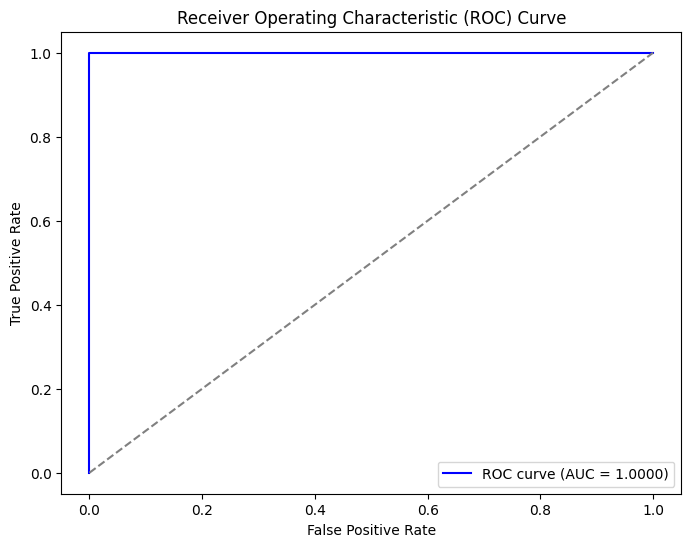

XGBoost Results:
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000, AUC: 1.0000
Confusion Matrix:
 [[  338     0]
 [    0 10156]]


In [15]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on validation data
y_pred_xgb = xgb_model.predict(X_val)

# Calculate metrics
accuracy_xgb = accuracy_score(y_val, y_pred_xgb)
precision_xgb = precision_score(y_val, y_pred_xgb)
recall_xgb = recall_score(y_val, y_pred_xgb)
f1_xgb = f1_score(y_val, y_pred_xgb)
auc_xgb = roc_auc_score(y_val, xgb_model.predict_proba(X_val)[:, 1])
cm_xgb = confusion_matrix(y_val, y_pred_xgb)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val, xgb_model.predict_proba(X_val)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_xgb:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print results
print("XGBoost Results:")
print("Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-Score: {:.4f}, AUC: {:.4f}".format(accuracy_xgb, precision_xgb, recall_xgb, f1_xgb, auc_xgb))
print("Confusion Matrix:\n", cm_xgb)


[LightGBM] [Info] Number of positive: 40610, number of negative: 1362
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008172 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9051
[LightGBM] [Info] Number of data points in the train set: 41972, number of used features: 67
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.967550 -> initscore=3.395060
[LightGBM] [Info] Start training from score 3.395060
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

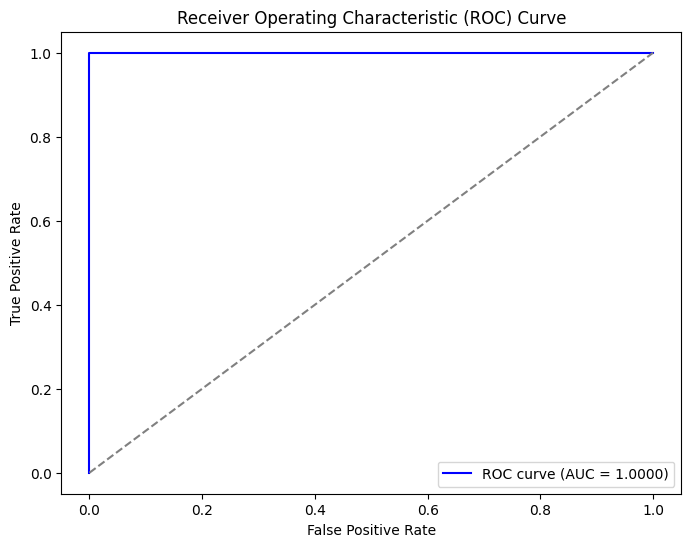

LightGBM Results:
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000, AUC: 1.0000
Confusion Matrix:
 [[  338     0]
 [    0 10156]]


In [16]:
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# Initialize and train the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# Predict on validation data
y_pred_lgb = lgb_model.predict(X_val)

# Calculate metrics
accuracy_lgb = accuracy_score(y_val, y_pred_lgb)
precision_lgb = precision_score(y_val, y_pred_lgb)
recall_lgb = recall_score(y_val, y_pred_lgb)
f1_lgb = f1_score(y_val, y_pred_lgb)
auc_lgb = roc_auc_score(y_val, lgb_model.predict_proba(X_val)[:, 1])
cm_lgb = confusion_matrix(y_val, y_pred_lgb)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val, lgb_model.predict_proba(X_val)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_lgb:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print results
print("LightGBM Results:")
print("Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-Score: {:.4f}, AUC: {:.4f}".format(accuracy_lgb, precision_lgb, recall_lgb, f1_lgb, auc_lgb))
print("Confusion Matrix:\n", cm_lgb)


c:\Users\Baki Akgun\New Folder\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


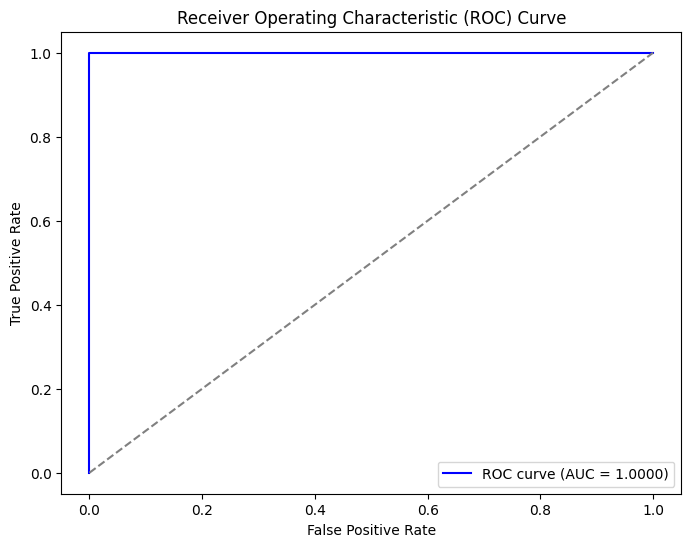

Logistic Regression Results:
Accuracy: 0.9999, Precision: 1.0000, Recall: 0.9999, F1-Score: 1.0000, AUC: 1.0000
Confusion Matrix:
 [[  338     0]
 [    1 10155]]


In [17]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# Initialize and train the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)

# Predict on validation data
y_pred_log_reg = log_reg_model.predict(X_val)

# Calculate metrics
accuracy_log_reg = accuracy_score(y_val, y_pred_log_reg)
precision_log_reg = precision_score(y_val, y_pred_log_reg)
recall_log_reg = recall_score(y_val, y_pred_log_reg)
f1_log_reg = f1_score(y_val, y_pred_log_reg)
auc_log_reg = roc_auc_score(y_val, log_reg_model.predict_proba(X_val)[:, 1])
cm_log_reg = confusion_matrix(y_val, y_pred_log_reg)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val, log_reg_model.predict_proba(X_val)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_log_reg:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print results
print("Logistic Regression Results:")
print("Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-Score: {:.4f}, AUC: {:.4f}".format(accuracy_log_reg, precision_log_reg, recall_log_reg, f1_log_reg, auc_log_reg))
print("Confusion Matrix:\n", cm_log_reg)


In [18]:
# Store results for the selected models
selected_models = ['Random Forest', 'XGBoost', 'LightGBM', 'Logistic Regression']
selected_accuracy = [accuracy_rf, accuracy_xgb, accuracy_lgb, accuracy_log_reg]
selected_precision = [precision_rf, precision_xgb, precision_lgb, precision_log_reg]
selected_recall = [recall_rf, recall_xgb, recall_lgb, recall_log_reg]
selected_f1 = [f1_rf, f1_xgb, f1_lgb, f1_log_reg]
selected_auc = [auc_rf, auc_xgb, auc_lgb, auc_log_reg]

# Store the results in a dictionary for selected models
results_selected = {
    'Model': selected_models,
    'Accuracy': selected_accuracy,
    'Precision': selected_precision,
    'Recall': selected_recall,
    'F1-Score': selected_f1,
    'AUC': selected_auc,
}

# Convert to DataFrame for easy display
results_df_selected = pd.DataFrame(results_selected)

# Save the results to a CSV file
results_df_selected.to_csv('model_results_selected.csv', index=False)
results_df_selected


,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,Random Forest,1.000000,1.0,1.000000,1.000000,1.0
1,XGBoost,1.000000,1.0,1.000000,1.000000,1.0
2,LightGBM,1.000000,1.0,1.000000,1.000000,1.0
3,Logistic Regression,0.999905,1.0,0.999902,0.999951,1.0


### RNN LSTM GRU (RNN+GRU+CNN+LSTM Ensemble) Models

Epoch 1/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9591 - loss: 0.1124 - val_accuracy: 0.9992 - val_loss: 0.0032
Epoch 2/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9991 - loss: 0.0033 - val_accuracy: 0.9994 - val_loss: 0.0015
Epoch 3/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9995 - loss: 0.0023 - val_accuracy: 0.9997 - val_loss: 0.0012
Epoch 4/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9997 - loss: 9.5883e-04 - val_accuracy: 0.9997 - val_loss: 5.7042e-04
Epoch 5/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9998 - loss: 9.2024e-04 - val_accuracy: 0.9998 - val_loss: 3.7435e-04
Epoch 6/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9997 - loss: 9.5482e-04 - val_accuracy: 1.0000 - val_loss: 2.6596e-04
Epoch 7/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9999 - loss: 3.6338e-04 - val_accuracy: 0.9999 - val_loss: 2.3624e-04
Epoch 8/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - ac

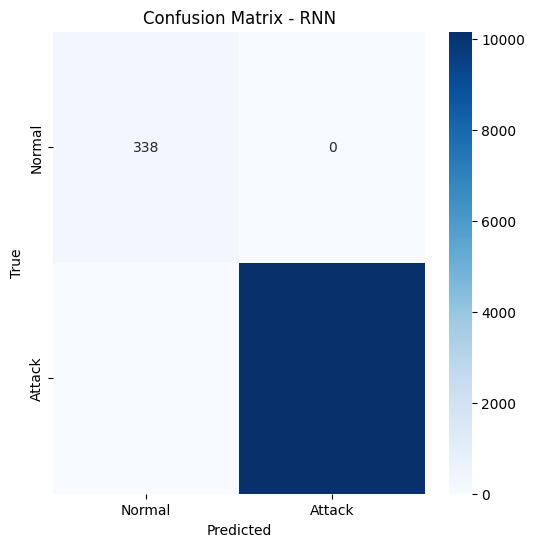

In [83]:
# RNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Input
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the RNN model
rnn_model = Sequential([
    Input(shape=input_shape),
    SimpleRNN(units=64, activation='tanh'),
    Dropout(0.2),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_rnn = rnn_model.fit(X_train_reshaped, y_train, validation_data=(X_val_reshaped, y_val), epochs=10, batch_size=32, callbacks=[early_stopping])

# Evaluate the model
y_pred_rnn = rnn_model.predict(X_val_reshaped)
y_pred_rnn = (y_pred_rnn > 0.5)

# Calculate metrics
accuracy_rnn = accuracy_score(y_val, y_pred_rnn)
precision_rnn = precision_score(y_val, y_pred_rnn)
recall_rnn = recall_score(y_val, y_pred_rnn)
f1_rnn = f1_score(y_val, y_pred_rnn)
auc_rnn = roc_auc_score(y_val, y_pred_rnn)

# Confusion Matrix for RNN
cm_rnn = confusion_matrix(y_val, y_pred_rnn)

# Plot the Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm_rnn, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.title('Confusion Matrix - RNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


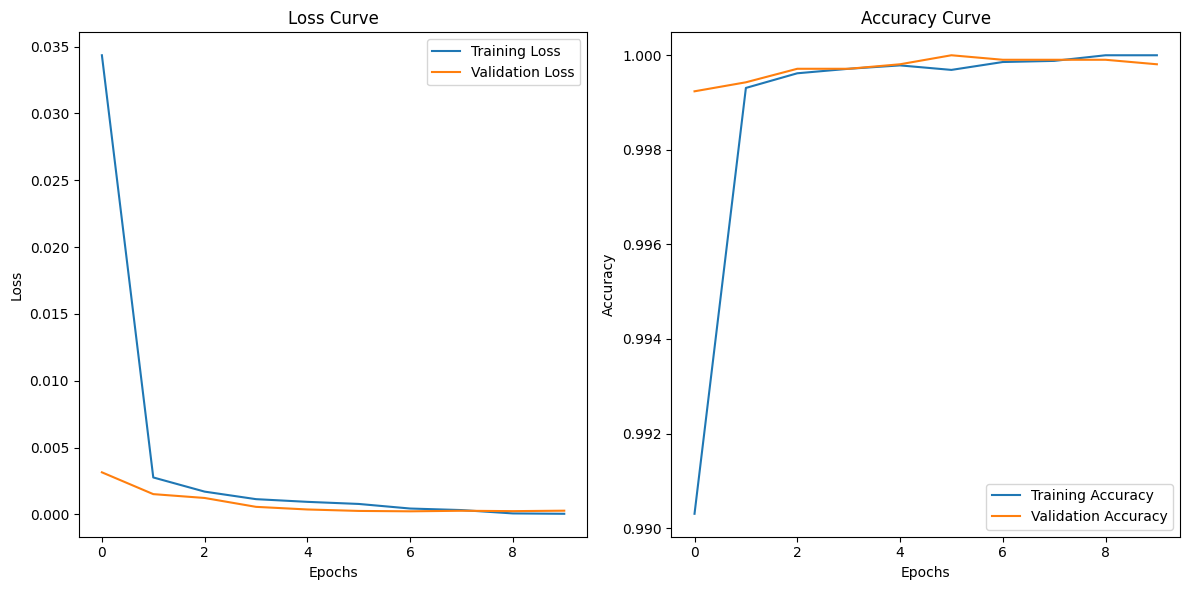

In [99]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['loss'], label='Training Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


Epoch 1/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9876 - loss: 0.0879 - val_accuracy: 0.9993 - val_loss: 0.0021
Epoch 2/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9995 - loss: 0.0019 - val_accuracy: 0.9993 - val_loss: 0.0016
Epoch 3/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9999 - loss: 8.6478e-04 - val_accuracy: 0.9995 - val_loss: 9.0121e-04
Epoch 4/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9999 - loss: 6.8902e-04 - val_accuracy: 0.9997 - val_loss: 7.1321e-04
Epoch 5/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9998 - loss: 5.2256e-04 - val_accuracy: 0.9998 - val_loss: 7.2968e-04
Epoch 6/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9998 - loss: 4.7827e-04 - val_accuracy: 0.9997 - val_loss: 6.9863e-04
Epoch 7/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9999 - loss: 3.0190e-04 - val_accuracy: 0.9998 - val_loss: 4.6395e-04
Epoch 8/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/s

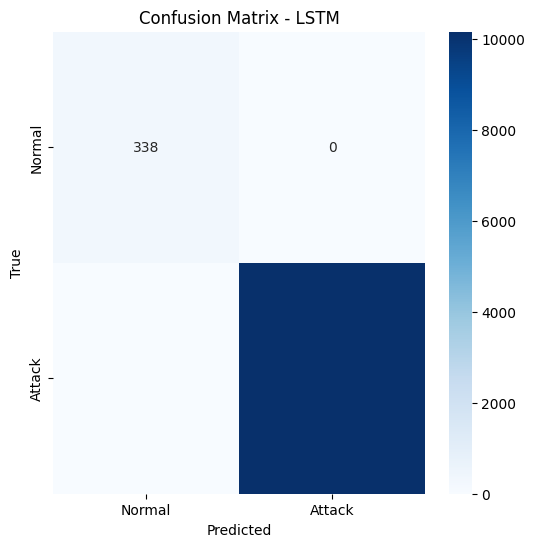

In [84]:
# LSTM Model
# Define the LSTM model
lstm_model = Sequential([
    Input(shape=input_shape),
    LSTM(units=64, activation='tanh'),
    Dropout(0.2),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_lstm = lstm_model.fit(X_train_reshaped, y_train, validation_data=(X_val_reshaped, y_val), epochs=10, batch_size=32, callbacks=[early_stopping])

# Evaluate the model
y_pred_lstm = lstm_model.predict(X_val_reshaped)
y_pred_lstm = (y_pred_lstm > 0.5)

# Calculate metrics
accuracy_lstm = accuracy_score(y_val, y_pred_lstm)
precision_lstm = precision_score(y_val, y_pred_lstm)
recall_lstm = recall_score(y_val, y_pred_lstm)
f1_lstm = f1_score(y_val, y_pred_lstm)
auc_lstm = roc_auc_score(y_val, y_pred_lstm)

# Confusion Matrix for LSTM
cm_lstm = confusion_matrix(y_val, y_pred_lstm)

# Plot the Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.title('Confusion Matrix - LSTM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


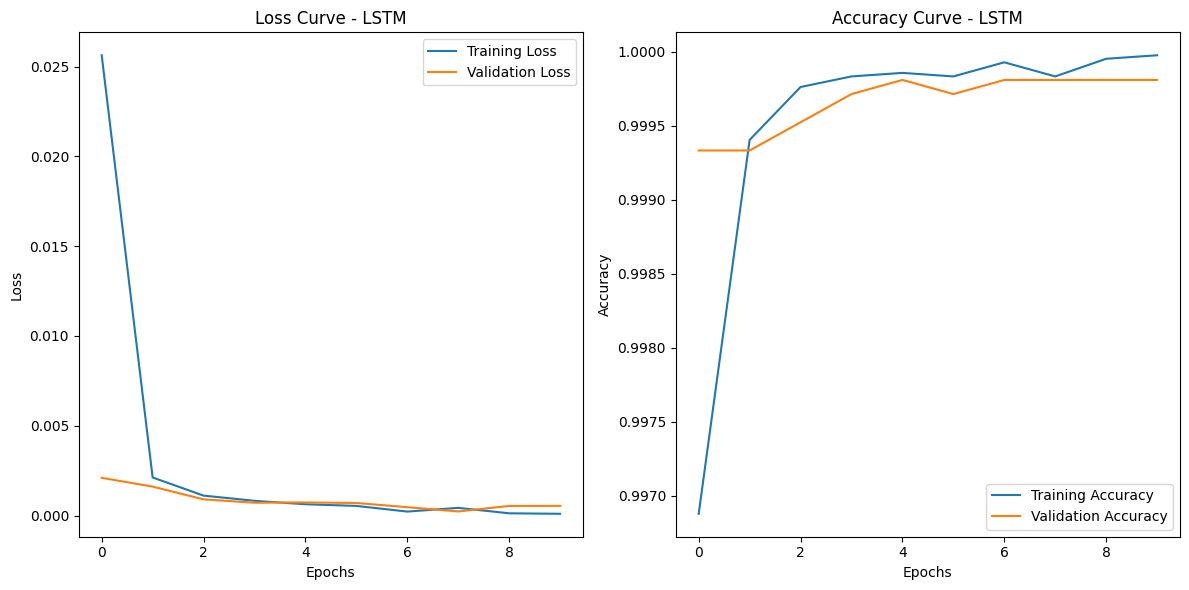

In [100]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve - LSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['accuracy'], label='Training Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve - LSTM')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


Epoch 1/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9886 - loss: 0.0712 - val_accuracy: 0.9995 - val_loss: 0.0016
Epoch 2/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9997 - loss: 0.0021 - val_accuracy: 0.9997 - val_loss: 8.2173e-04
Epoch 3/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9996 - loss: 0.0015 - val_accuracy: 0.9997 - val_loss: 7.5845e-04
Epoch 4/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9996 - loss: 0.0010 - val_accuracy: 0.9994 - val_loss: 0.0018
Epoch 5/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9999 - loss: 3.4101e-04 - val_accuracy: 0.9995 - val_loss: 6.9214e-04
Epoch 6/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9998 - loss: 4.8780e-04 - val_accuracy: 0.9998 - val_loss: 5.7527e-04
Epoch 7/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 1.2096e-04 - val_accuracy: 0.9998 - val_loss: 4.2421e-04
Epoch 8/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - ac

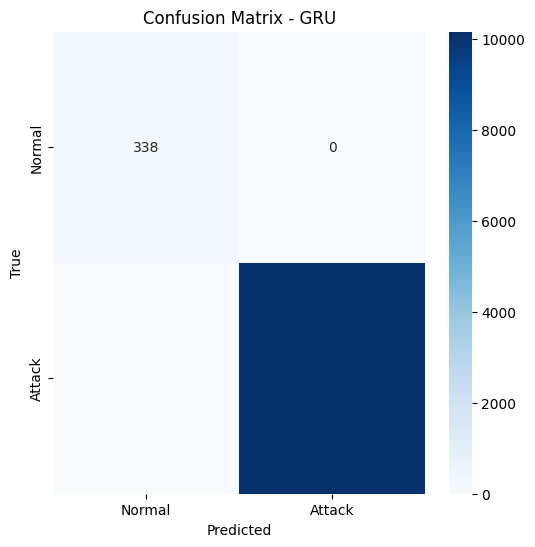

In [86]:
from tensorflow.keras.layers import GRU
# GRU Model
# Define the GRU model
gru_model = Sequential([
    Input(shape=input_shape),
    GRU(units=64, activation='tanh'),
    Dropout(0.2),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_gru = gru_model.fit(X_train_reshaped, y_train, validation_data=(X_val_reshaped, y_val), epochs=10, batch_size=32, callbacks=[early_stopping])

# Evaluate the model
y_pred_gru = gru_model.predict(X_val_reshaped)
y_pred_gru = (y_pred_gru > 0.5)

# Calculate metrics
accuracy_gru = accuracy_score(y_val, y_pred_gru)
precision_gru = precision_score(y_val, y_pred_gru)
recall_gru = recall_score(y_val, y_pred_gru)
f1_gru = f1_score(y_val, y_pred_gru)
auc_gru = roc_auc_score(y_val, y_pred_gru)

# Confusion Matrix for GRU
cm_gru = confusion_matrix(y_val, y_pred_gru)

# Plot the Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm_gru, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.title('Confusion Matrix - GRU')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


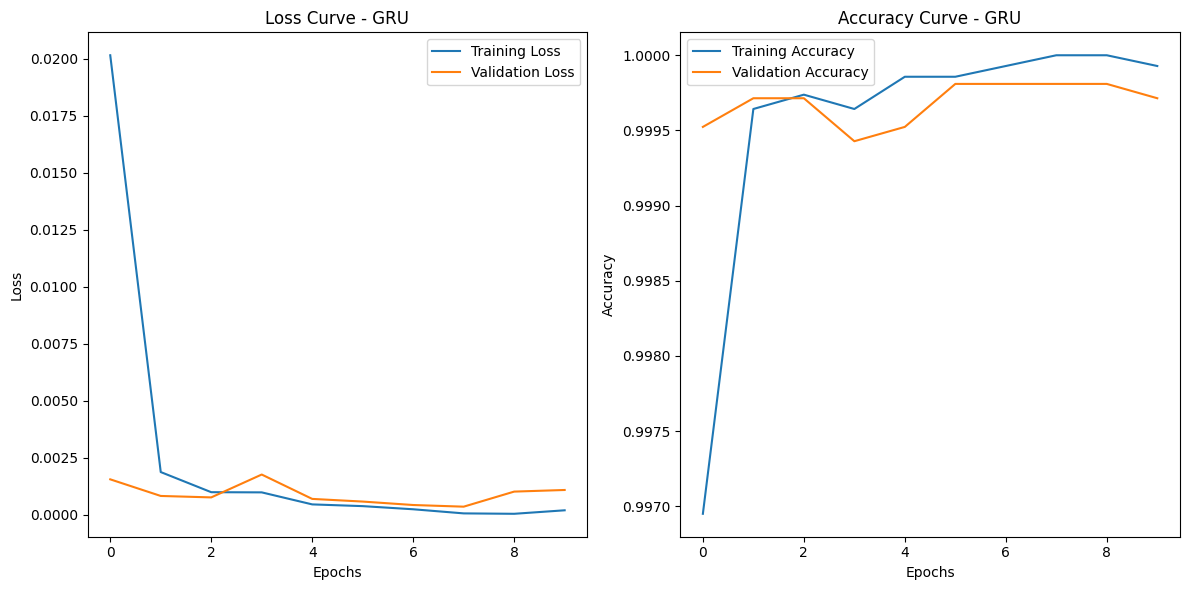

In [101]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_gru.history['loss'], label='Training Loss')
plt.plot(history_gru.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve - GRU')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_gru.history['accuracy'], label='Training Accuracy')
plt.plot(history_gru.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve - GRU')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


Epoch 1/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 54s 36ms/step - accuracy: 0.9834 - loss: 0.0622 - val_accuracy: 0.9994 - val_loss: 0.0022
Epoch 2/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 46s 35ms/step - accuracy: 0.9996 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 3.8853e-05
Epoch 3/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 46s 35ms/step - accuracy: 0.9999 - loss: 2.1185e-04 - val_accuracy: 1.0000 - val_loss: 8.9851e-06
Epoch 4/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 44s 33ms/step - accuracy: 1.0000 - loss: 1.0845e-05 - val_accuracy: 1.0000 - val_loss: 3.8713e-06
Epoch 5/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 44s 33ms/step - accuracy: 1.0000 - loss: 4.8929e-06 - val_accuracy: 1.0000 - val_loss: 1.8700e-06
Epoch 6/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 44s 33ms/step - accuracy: 1.0000 - loss: 2.5071e-06 - val_accuracy: 1.0000 - val_loss: 9.3120e-07
Epoch 7/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 44s 33ms/step - accuracy: 1.0000 - loss: 1.2914e-06 - val_accuracy: 1.0000 - val_loss: 4.6598e-07
Epoch 8/10
1312/1312 ━━━━━━━━━━━

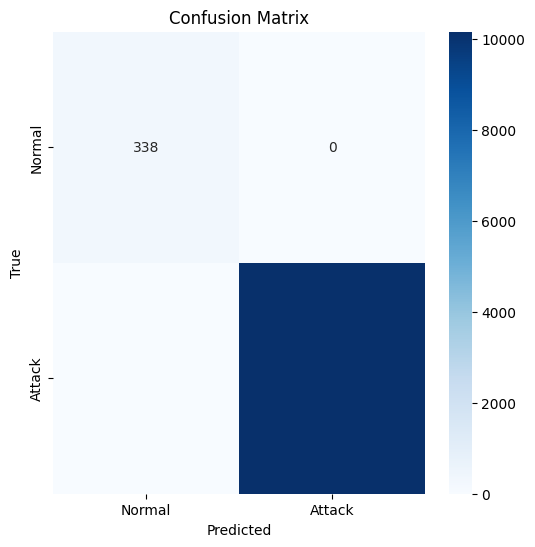

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
AUC: 1.0000


In [91]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Bidirectional, GRU, Dropout, Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

# Define the input shape: (samples, time_steps, features)
input_shape = (X_train.shape[1], 1)  # Adjust based on the actual number of features

# Build the model
model = Sequential([
    Input(shape=input_shape),
    
    # 1D Convolutional Layer with 'same' padding to preserve sequence length
    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2),  # Reduce sequence length by a factor of 2
    
    # LSTM Layer
    LSTM(units=64, activation='tanh', return_sequences=True),  # Use return_sequences=True to pass sequences to next layers
    
    # Bidirectional LSTM Layer
    Bidirectional(LSTM(units=64, activation='tanh', return_sequences=True)),  # Make sure the output is 3D
    
    # GRU Layer - Now accepts 3D input
    GRU(units=64, activation='tanh'),
    
    # Dropout Layer
    Dropout(0.2),
    
    # Dense Output Layer
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(patience=3, monitor='val_loss')

# Reshape the input data (if necessary)
X_train_reshaped = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val_reshaped = X_val.values.reshape(X_val.shape[0], X_val.shape[1], 1)

# Train the model
history = model.fit(X_train_reshaped, y_train, 
                    validation_data=(X_val_reshaped, y_val), 
                    epochs=10, batch_size=32, 
                    callbacks=[early_stopping])

# Evaluate the model
y_pred = model.predict(X_val_reshaped)
y_pred = (y_pred > 0.5)

# Calculate metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
auc = roc_auc_score(y_val, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Display results
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))
print("AUC: {:.4f}".format(auc))


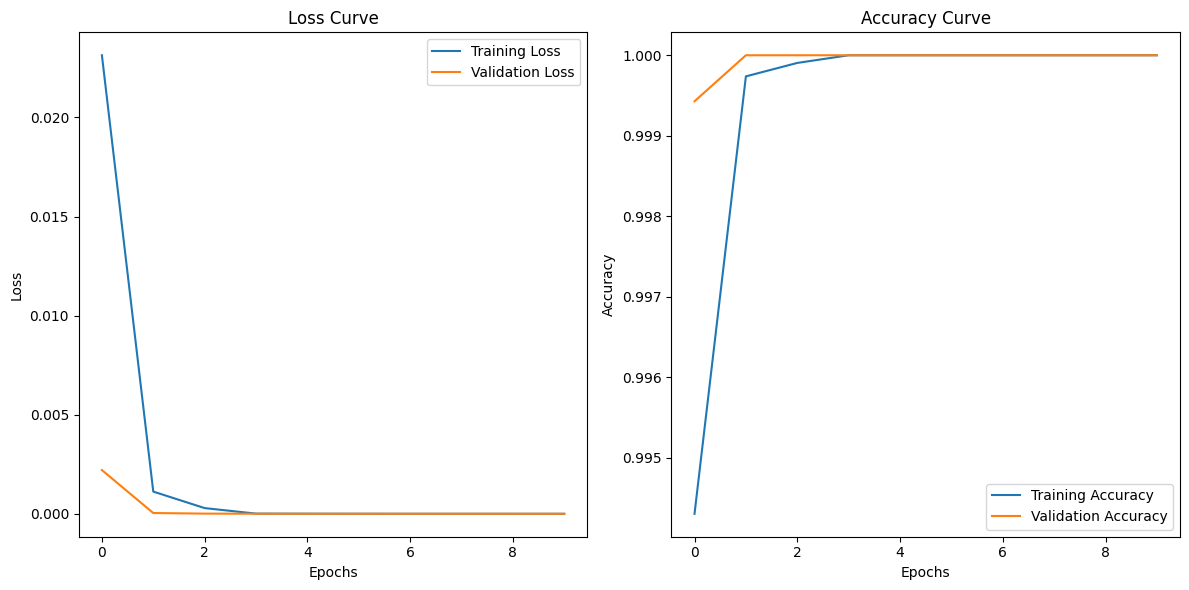

In [102]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [96]:
# Store results in a dictionary
results = {
    'Model': ['RNN', 'LSTM', 'GRU', 'CNN+LSTM+BiLSTM+GRU'],
    'Accuracy': [accuracy_rnn, accuracy_lstm, accuracy_gru, accuracy],
    'Precision': [precision_rnn, precision_lstm, precision_gru, precision],
    'Recall': [recall_rnn, recall_lstm, recall_gru, recall],
    'F1-Score': [f1_rnn, f1_lstm, f1_gru, f1],
    'AUC': [auc_rnn, auc_lstm, auc_gru, accuracy]
}

# Convert to DataFrame for easy display
results_df = pd.DataFrame(results)

# Save the results to CSV
results_df.to_csv('model_performance.csv', index=False)

# Display the results
results_df


,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,RNN,0.999809,1.0,0.999803,0.999902,0.999902
1,LSTM,0.999809,1.0,0.999803,0.999902,0.999902
2,GRU,0.999714,1.0,0.999705,0.999852,0.999852
3,CNN+LSTM+BiLSTM+GRU,1.000000,1.0,1.000000,1.000000,1.000000


### All Results

In [98]:
import pandas as pd

# Store results for the selected models
selected_models = ['Random Forest', 'XGBoost', 'LightGBM', 'Logistic Regression']
selected_accuracy = [accuracy_rf, accuracy_xgb, accuracy_lgb, accuracy_log_reg]
selected_precision = [precision_rf, precision_xgb, precision_lgb, precision_log_reg]
selected_recall = [recall_rf, recall_xgb, recall_lgb, recall_log_reg]
selected_f1 = [f1_rf, f1_xgb, f1_lgb, f1_log_reg]
selected_auc = [auc_rf, auc_xgb, auc_lgb, auc_log_reg]

# Store the results in a dictionary for selected models
results_selected = {
    'Model': selected_models,
    'Accuracy': selected_accuracy,
    'Precision': selected_precision,
    'Recall': selected_recall,
    'F1-Score': selected_f1,
    'AUC': selected_auc,
}

# Store results for other models
results_other = {
    'Model': ['RNN', 'LSTM', 'GRU', 'CNN+LSTM+BiLSTM+GRU'],
    'Accuracy': [accuracy_rnn, accuracy_lstm, accuracy_gru, accuracy],
    'Precision': [precision_rnn, precision_lstm, precision_gru, precision],
    'Recall': [recall_rnn, recall_lstm, recall_gru, recall],
    'F1-Score': [f1_rnn, f1_lstm, f1_gru, f1],
    'AUC': [auc_rnn, auc_lstm, auc_gru, accuracy],
}

# Convert both results to DataFrames
results_df_selected = pd.DataFrame(results_selected)
results_df_other = pd.DataFrame(results_other)

# Combine the two DataFrames into one
results_df_combined = pd.concat([results_df_other, results_df_selected], ignore_index=True)

# Save the combined results to a CSV file
results_df_combined.to_csv('combined_model_results.csv', index=False)

# Display the combined results
results_df_combined


,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,RNN,0.999809,1.0,0.999803,0.999902,0.999902
1,LSTM,0.999809,1.0,0.999803,0.999902,0.999902
2,GRU,0.999714,1.0,0.999705,0.999852,0.999852
3,CNN+LSTM+BiLSTM+GRU,1.000000,1.0,1.000000,1.000000,1.000000
4,Random Forest,1.000000,1.0,1.000000,1.000000,1.000000
5,XGBoost,1.000000,1.0,1.000000,1.000000,1.000000
6,LightGBM,1.000000,1.0,1.000000,1.000000,1.000000
7,Logistic Regression,0.999905,1.0,0.999902,0.999951,1.000000


## LSTM Prediction

In [64]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import time

# Verify the correct number of features
num_features = X_train.shape[1]  # Assuming X_train has shape (41972, 4)

# Reshape the input data to include a time step dimension
# Correct shape: (samples, time_steps, features)
X_train_reshaped = X_train.values.reshape(X_train.shape[0], 1, num_features)
X_val_reshaped = X_val.values.reshape(X_val.shape[0], 1, num_features)

# Define the input shape for the LSTM
input_shape = (1, num_features)

# Build the Bi-LSTM model
model = Sequential([
    Input(shape=input_shape),
    Bidirectional(LSTM(units=64, activation='tanh')),
    Dropout(0.2),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Add early stopping
early_stopping = EarlyStopping(patience=3, monitor='val_loss')

# Train the model
start_time = time.time()
history = model.fit(
    X_train_reshaped, y_train, 
    validation_data=(X_val_reshaped, y_val),
    epochs=10, batch_size=32, callbacks=[early_stopping]
)
end_time = time.time()

# Print training time
training_time = end_time - start_time
print("Training Time: {:.5f} seconds".format(training_time))


Epoch 1/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9824 - loss: 0.0768 - val_accuracy: 0.9994 - val_loss: 0.0023
Epoch 2/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9996 - loss: 0.0021 - val_accuracy: 0.9994 - val_loss: 0.0011
Epoch 3/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9997 - loss: 0.0014 - val_accuracy: 0.9994 - val_loss: 0.0011
Epoch 4/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9998 - loss: 6.4846e-04 - val_accuracy: 0.9998 - val_loss: 4.4971e-04
Epoch 5/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9998 - loss: 6.9731e-04 - val_accuracy: 0.9996 - val_loss: 9.1792e-04
Epoch 6/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9999 - loss: 2.5902e-04 - val_accuracy: 0.9997 - val_loss: 3.8455e-04
Epoch 7/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9999 - loss: 4.0021e-04 - val_accuracy: 0.9999 - val_loss: 1.8790e-04
Epoch 8/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - ac

328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


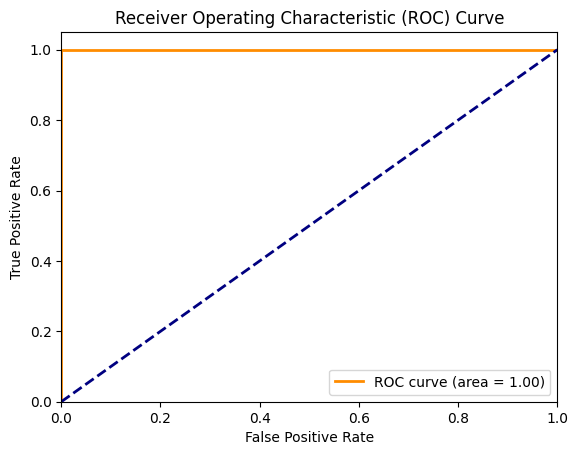

In [68]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities
y_pred_probs = model.predict(X_val_reshaped)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

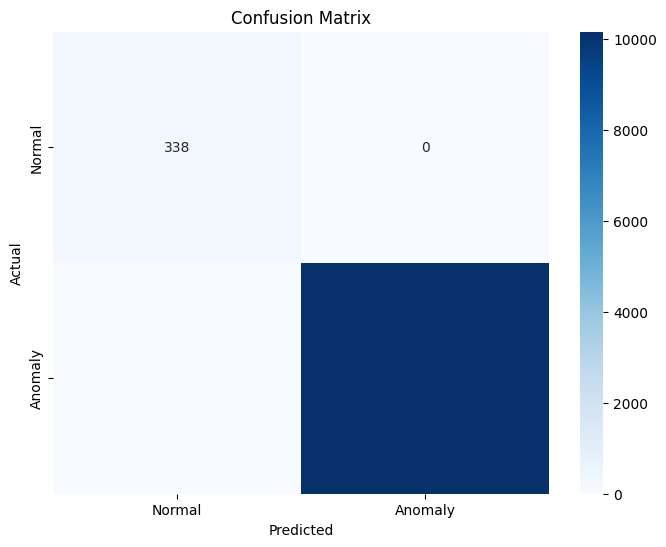

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

# Convert probabilities to class predictions
y_pred = (y_pred_probs > 0.5).astype(int)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Normal', 'Anomaly'])
plt.yticks([0.5, 1.5], ['Normal', 'Anomaly'])
plt.show()

In [70]:
# Calculate metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9998094149037545
Precision: 1.0
Recall: 0.9998030720756204
F1 Score: 0.9999015263417036


In [71]:
# Prediction time
start_time = time.time()
y_pred = model.predict(X_val_reshaped)
end_time = time.time()
overhead = end_time - start_time
overhead_percentage = (overhead / training_time) * 100
delay = overhead / len(X_val_reshaped)

print("Overhead (Time taken by the model to make predictions): {:.5f} seconds".format(overhead))
print("Overhead Percentage: {}%".format(overhead_percentage))
print("Delay (Average time taken per data point for prediction):{:.5f} seconds".format(delay))

328/328 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step
Overhead (Time taken by the model to make predictions): 0.40519 seconds
Overhead Percentage: 1.1970808326383147%
Delay (Average time taken per data point for prediction):0.00004 seconds
